In [1]:
import pandas as pd
from sklearn import (
    preprocessing
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold
)
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Valor total de dados faltantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Valor percentual de dados faltantes
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
mask = df.isnull().any(axis=1)

In [8]:
mask.head()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [9]:
df[mask].Age.head()

0    22.0
2    26.0
4    35.0
5     NaN
7     2.0
Name: Age, dtype: float64

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.Sex.value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df.Embarked.value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [13]:
df = df.drop(columns=[
    "Name", # Colunas com valores distintos, não agregam para um modelo.
    "Ticket",
    "Cabin"
])

In [14]:
df.isnull().sum()

# Agora só temos Age e Embarked com valores nulos, porém são dados importantes para o modelo, então não removeremos

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [15]:
# Primeiro iremos criar colunas dummies para elas
df = pd.get_dummies(df)

In [16]:
# Agora temos colunas separadas para cada valor
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [17]:
# E podemos remover ou Sex_male ou Sex_Female, pois tem correlação perfeita, assim, evitando problemas de multicolinearidade
# Da mesma forma com Embarked, pois se não for "Q", nem "S", automaticamente se entende que é "C"
df = df.drop(columns=["Sex_male", "Embarked_C"])

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [19]:
# Iremos separar o "Survived", para usar na validação do modelo
y = df.Survived
X = df.drop(columns="Survived")

## Separar as amostras

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Imputação dos dados

In [21]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Age            124
SibSp            0
Parch            0
Fare             0
Sex_female       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [22]:
# A imputação dos dados faltantes deve ser feita após a separação das amostras, pois, deve criar o imputer usando apenas o treino, para não mostrar dados do teste ao modelo. Depois, aplicar esse mesmo imputer no teste.

# Nesse caso usaremos um imputer indutivo e não um transdutivo

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train[["Age"]])
X_train["Age"] = imputer.transform(X_train[["Age"]])
X_test["Age"] = imputer.transform(X_test[["Age"]])


In [23]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Embarked_Q     0
Embarked_S     0
dtype: int64

## Normalização dos dados

In [24]:
# Padronizar os dados de uma forma que tenham um valor de média igual a zero e um desvio-padrão igual a um.

cols = "Pclass,Age,SibSp,Fare".split(",")
sca = preprocessing.StandardScaler()

X_train[cols] = sca.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train[cols], columns=cols)

X_test[cols] = sca.transform(X_test[cols]) # somente transform no dataset de test, para evitar data leakage
X_test[cols] = pd.DataFrame(X_test[cols], columns=cols)

In [25]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S
445,446,-1.637881,-1.919719,-0.474161,2,0.980998,False,False,True
650,651,0.803267,-0.077252,-0.474161,0,-0.469634,False,False,True
172,173,0.803267,-2.150028,0.348687,1,-0.406136,True,False,True
450,451,-0.417307,0.536903,0.348687,2,-0.080232,False,False,True
314,315,-0.417307,1.074289,0.348687,1,-0.109651,False,False,True


## Refatoração do Código

In [26]:
# Etapa importante pensando a longo prazo, pois dessa forma, fica muito mais simples de acessar e fazer modificações nas etapas de pré-processamento.

def tweak_titanic(df):
    df = (
        df.drop(
            columns=[
                "Name", # Colunas com valores distintos, não agregam para um modelo.
                "Ticket",
                "Cabin",
                "PassengerId"
            ]
        )
        .pipe(pd.get_dummies, drop_first=True) #pipe() usado para encadear operações, assim posso passar o df na função e já delvover de forma rápida.
    )
    return df

In [27]:
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    '''
    df = df limpo
    y_col = Variável Independente
    size = Tamanho do df de teste
    std_cols = Lista com colunas que precisam ser normalizadas
    '''
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, random_state=42
    )

    cols = X.columns
    num_cols = [
        "Pclass",
        "Age",
        "SibSp",
        "Parch",    
        "Fare"
    ]
    imputer = SimpleImputer(strategy="median")
    imputer.fit(X_train[num_cols])
    X_train[num_cols] = imputer.transform(X_train[num_cols])
    X_test[num_cols] = imputer.transform(X_test[num_cols])

    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[:, std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:, std_cols] = std.transform(X_test[std_cols])

    return X_train, X_test, y_train, y_test

In [28]:
refatorar = pd.read_csv('train.csv')
refatorar_clean = tweak_titanic(refatorar)

In [29]:
refatorar_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [30]:
std_cols = "Pclass,Age,SibSp,Parch,Fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(refatorar_clean, "Survived", std_cols=std_cols)

## Modelo Dummy

In [31]:
# Criaremos um modelo Dummy, com a ideia de comparar com outros modelos

from sklearn.dummy import DummyClassifier
bm = DummyClassifier(strategy="stratified")
bm.fit(X_train, y_train)
bm.score(X_test, y_test) # acurácia

0.5746268656716418

In [32]:
from sklearn import metrics
metrics.precision_score(y_test, bm.predict(X_test)) # precisão

0.3617021276595745

## Teste com Modelos Melhores

In [33]:
# Iremos fazer Cross Validation, dessa forma não é necessário que tenha separação dos dados, pois ele mesmo já vai fazer essa separação.
# Então vamos juntar para ter uma maior amostra
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# Modelos de classificação
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier]:
    cls = model() # Instância dos modelos, com os parâmetros padrões
    # Cross Validation com ROC AUC
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    s = model_selection.cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    print(f"{model.__name__:22} AUC: "
          f"{s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier        AUC: 0.500 STD: 0.00
LogisticRegression     AUC: 0.848 STD: 0.06
DecisionTreeClassifier AUC: 0.776 STD: 0.04
KNeighborsClassifier   AUC: 0.838 STD: 0.07
GaussianNB             AUC: 0.827 STD: 0.07
SVC                    AUC: 0.844 STD: 0.07
RandomForestClassifier AUC: 0.860 STD: 0.06
XGBClassifier          AUC: 0.862 STD: 0.06


## Stacking

In [34]:
# Tentaremos fazer um Stacking com os resultados desses modelos, a fim de conseguir melhores resultados
# Porém, perderemos poder de interpretabilidade dos dados

from sklearn.ensemble import StackingClassifier

estimators = [
    ("lr", LogisticRegression()),
    ("tree", DecisionTreeClassifier()),
    ("knn", KNeighborsClassifier()),
    ("nb", GaussianNB()),
    ("svc", SVC(probability=True)),
    ("rf", RandomForestClassifier())
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    stack_method="predict_proba"
)

s = model_selection.cross_val_score(
    stack, X, y, scoring="roc_auc", cv=kfold
)

print(f"{stack.__class__.__name__}" 
      f"AUC: {s.mean():.3f} STD: {s.std():.2f}")


StackingClassifierAUC: 0.871 STD: 0.06


## Criação do Modelo

In [35]:
# Usarei um classificador de floresta aleatória (random forest) para criar um modelo. É um modelo flexível, que tende a dar resultados razoáveis prontamente.

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [36]:
# Nesse caso não faremos cross-validation, então usaremos os dados de treinamentos separados anteriormente

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
print(f"Acurácia: {rf.score(X_test, y_test)}")
print(f"Precisão: {metrics.precision_score(y_test, rf.predict(X_test))}")

Acurácia: 0.7798507462686567
Precisão: 0.7452830188679245


In [38]:
# Variáveis mais importantes para o modelo

for col, val in sorted(
    zip(
        X_train.columns,
        rf.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

Fare           0.271
Sex_male       0.256
Age            0.255
Pclass         0.086
SibSp          0.055


## Otimizar o Modelo

In [39]:
# Testar as melhores combinações possíveis de hiperparâmetros com o Cross Validation do GridSearch

rf4 = RandomForestClassifier()

params = {
    "max_features": [0.4, "sqrt"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42], 
}

cv = model_selection.GridSearchCV(
    rf4, params, n_jobs=-1
).fit(X_train, y_train)

print(cv.best_params_)

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [40]:
# Aplicar os melhores resultados em um modelo

rf5 = RandomForestClassifier(
    max_features="sqrt",
    n_estimators=200,
    min_samples_leaf=1,
    random_state=42
    )

rf5.fit(X_train, y_train)

print(f"Acurácia: {rf5.score(X_test, y_test)}")
print(f"Precisão: {metrics.precision_score(y_test, rf5.predict(X_test))}")


Acurácia: 0.7835820895522388
Precisão: 0.7523809523809524


## Matriz de Confusão

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = rf5.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[131,  26],
       [ 32,  79]])

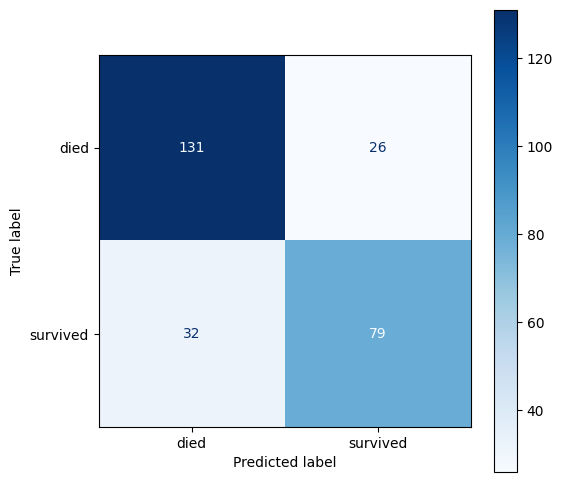

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 6))

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["died", "survived"],
    cmap="Blues",
    ax=ax
)

fig.savefig(
    "images/rf_confusion_matrix_0304.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

## Curva ROC

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = rf5.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)


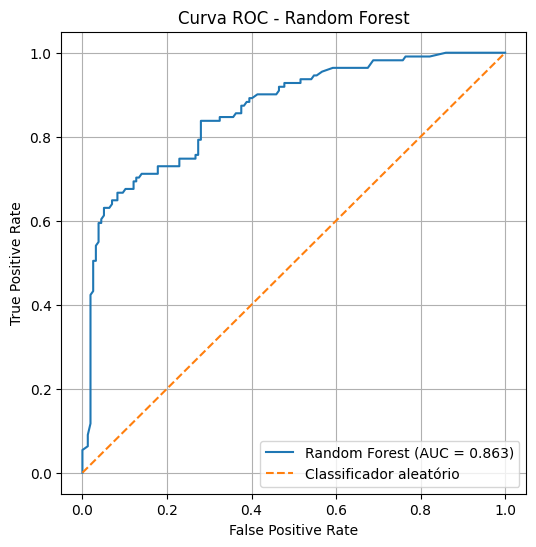

In [44]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Classificador aleatório')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


## Curva de Aprendizado

In [46]:
from sklearn.model_selection import learning_curve
import numpy as np

In [47]:
train_sizes, train_scores, val_scores, = learning_curve(
    estimator=rf5,
    X=X,
    y=y,
    cv=5,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

In [48]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

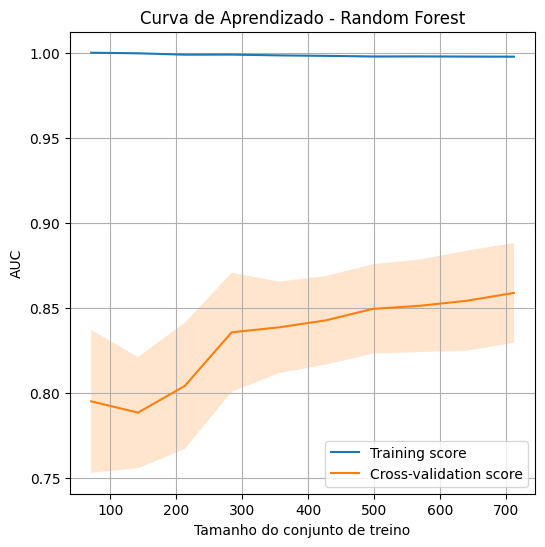

In [55]:
plt.figure(figsize=(6, 6))

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, val_mean, label="Cross-validation score")

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("AUC")
plt.title("Curva de Aprendizado - Random Forest")
plt.legend()
plt.grid(True)
plt.show()
